<a href="https://colab.research.google.com/github/SongAriAri/AI4DL/blob/main/glove_baseline_bert_AI4DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install keras_preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import numpy as np

# 1. Quick look

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train = pd.read_csv("drive/MyDrive/AI4DL_project/train.csv")
test = pd.read_csv("drive/MyDrive/AI4DL_project/test.csv")

In [ ]:
display(train.head())
print(len(train))
display(test.head())
print(len(test))

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


7613


,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


3263


## distribution

In [ ]:
x = train["target"].value_counts()
x.shape

(2,)

In [ ]:
x

0    4342
1    3271
Name: target, dtype: int64

In [ ]:
print(x)
print(x.values)

0    4342
1    3271
Name: target, dtype: int64
[4342 3271]


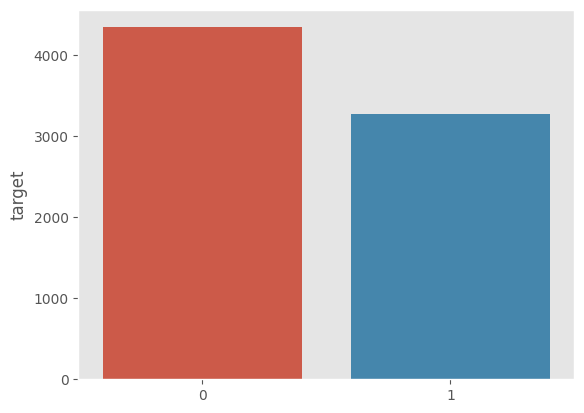

Text(0.5, 1.0, 'distribution')

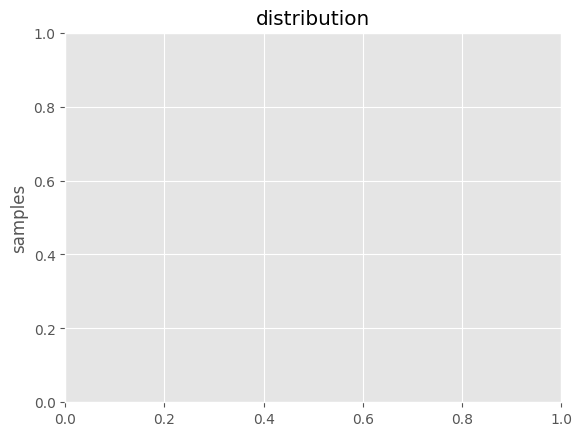

In [ ]:
plt.grid()
sns.barplot(x=x.index, y=x)
plt.show()
plt.gca().set_ylabel("samples")
plt.title("distribution")

Text(0.5, 1.0, 'Disaster tweets length')

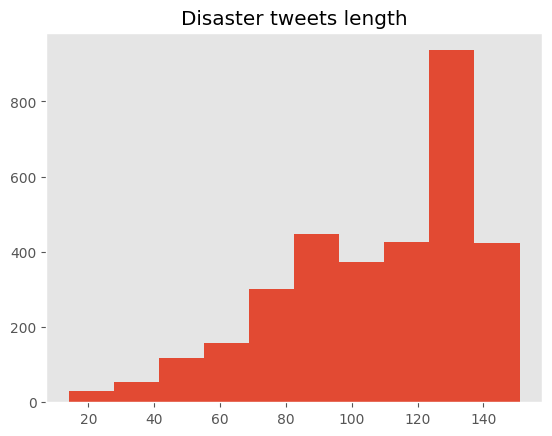

In [ ]:
plt.grid()

plt.hist(train[train["target"] == 1]["text"].str.len())
plt.title("Disaster tweets length")

Text(0.5, 1.0, 'No disaster tweets length')

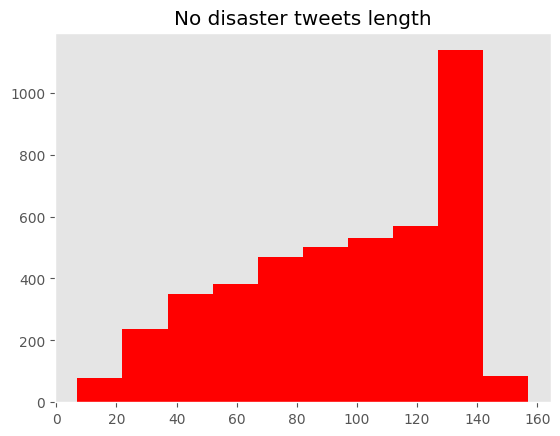

In [ ]:
plt.grid()

plt.hist(train[train["target"] == 0]["text"].str.len(), color= 'r')
plt.title("No disaster tweets length")

<ipython-input-309-a62a80c2feb9>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(word1.map(lambda x: np.mean(x)))


Text(0.5, 1.0, 'Disaster tweets length')

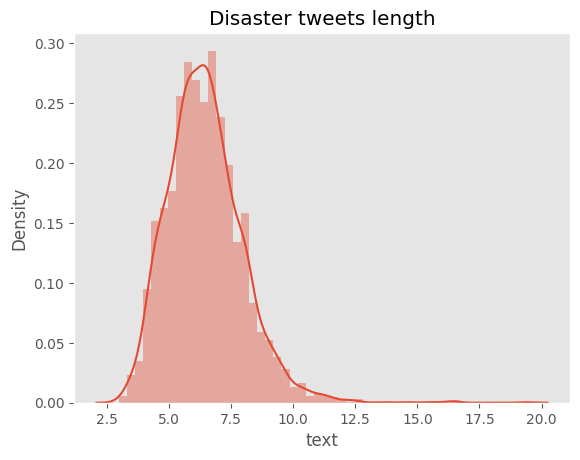

In [ ]:
plt.grid()

word1 = train[train["target"] == 1]["text"].str.split().apply(lambda x:[len(i) for i in x])
sns.distplot(word1.map(lambda x: np.mean(x)))
plt.title("Disaster tweets length")

<ipython-input-310-d0fd6e11812f>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(word1.map(lambda x: np.mean(x)), color = 'r')


Text(0.5, 1.0, 'Disaster tweets length')

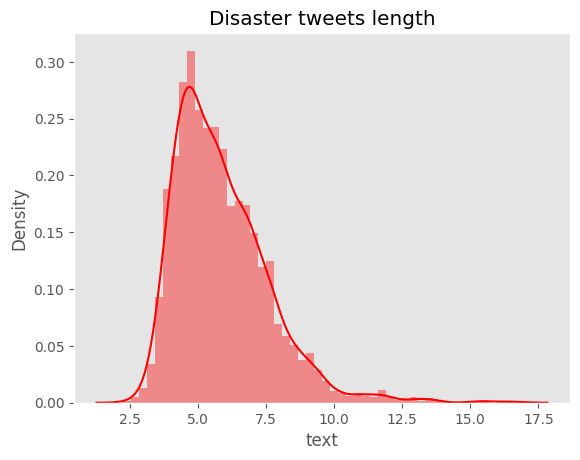

In [ ]:
plt.grid()

word1 = train[train["target"] == 0]["text"].str.split().apply(lambda x:[len(i) for i in x])
sns.distplot(word1.map(lambda x: np.mean(x)), color = 'r')
plt.title("Disaster tweets length")

# 2. Create corpus

In [ ]:
x

0    4342
1    3271
Name: target, dtype: int64

In [ ]:
def create_corpus(target):
    corpus = []
    for x in train[train["target"] == target]["text"].str.split():
        print(x)
        for i in x:
            corpus.append(i)

    return corpus

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from collections import defaultdict
from nltk.corpus import stopwords
from nltk.util import ngrams

In [ ]:
corpus = create_corpus(0)

stop = set(stopwords.words("english"))

dictionary = defaultdict(int)
for word in corpus:
    if word in stop:
        dictionary[word] +=1

top = sorted(dictionary.items(), key = lambda x:x[1], reverse=True)[:10]

["What's", 'up', 'man?']
['I', 'love', 'fruits']
['Summer', 'is', 'lovely']
['My', 'car', 'is', 'so', 'fast']
['What', 'a', 'goooooooaaaaaal!!!!!!']
['this', 'is', 'ridiculous....']
['London', 'is', 'cool', ';)']
['Love', 'skiing']
['What', 'a', 'wonderful', 'day!']
['LOOOOOOL']
['No', 'way...I', "can't", 'eat', 'that', 'shit']
['Was', 'in', 'NYC', 'last', 'week!']
['Love', 'my', 'girlfriend']
['Cooool', ':)']
['Do', 'you', 'like', 'pasta?']
['The', 'end!']
['We', 'always', 'try', 'to', 'bring', 'the', 'heavy.', '#metal', '#RT', 'http://t.co/YAo1e0xngw']
['Crying', 'out', 'for', 'more!', 'Set', 'me', 'ablaze']
['On', 'plus', 'side', 'LOOK', 'AT', 'THE', 'SKY', 'LAST', 'NIGHT', 'IT', 'WAS', 'ABLAZE', 'http://t.co/qqsmshaJ3N']
['@PhDSquares', '#mufc', "they've", 'built', 'so', 'much', 'hype', 'around', 'new', 'acquisitions', 'but', 'I', 'doubt', 'they', 'will', 'set', 'the', 'EPL', 'ablaze', 'this', 'season.']
['Ablaze', 'for', 'you', 'Lord', ':D']
['Check', 'these', 'out:', 'http://t.co

In [ ]:
x

0    4342
1    3271
Name: target, dtype: int64

Text(0.5, 1.0, 'top words 0')

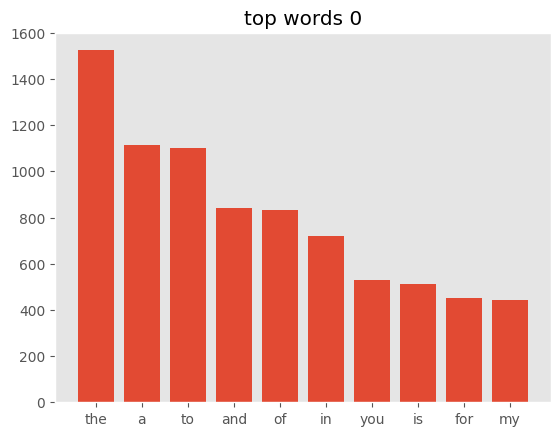

In [ ]:
x, y = zip(*top)

plt.grid()
plt.bar(x,y)
plt.title("top words 0")

In [ ]:
corpus = create_corpus(1)

stop = set(stopwords.words("english"))

dictionary = defaultdict(int)
for word in corpus:
    if word in stop:
        dictionary[word] +=1

top = sorted(dictionary.items(), key = lambda x:x[1], reverse=True)[:10]

['Our', 'Deeds', 'are', 'the', 'Reason', 'of', 'this', '#earthquake', 'May', 'ALLAH', 'Forgive', 'us', 'all']
['Forest', 'fire', 'near', 'La', 'Ronge', 'Sask.', 'Canada']
['All', 'residents', 'asked', 'to', "'shelter", 'in', "place'", 'are', 'being', 'notified', 'by', 'officers.', 'No', 'other', 'evacuation', 'or', 'shelter', 'in', 'place', 'orders', 'are', 'expected']
['13,000', 'people', 'receive', '#wildfires', 'evacuation', 'orders', 'in', 'California']
['Just', 'got', 'sent', 'this', 'photo', 'from', 'Ruby', '#Alaska', 'as', 'smoke', 'from', '#wildfires', 'pours', 'into', 'a', 'school']
['#RockyFire', 'Update', '=>', 'California', 'Hwy.', '20', 'closed', 'in', 'both', 'directions', 'due', 'to', 'Lake', 'County', 'fire', '-', '#CAfire', '#wildfires']
['#flood', '#disaster', 'Heavy', 'rain', 'causes', 'flash', 'flooding', 'of', 'streets', 'in', 'Manitou,', 'Colorado', 'Springs', 'areas']
["I'm", 'on', 'top', 'of', 'the', 'hill', 'and', 'I', 'can', 'see', 'a', 'fire', 'in', 'the', 'w

Text(0.5, 1.0, 'top words 1')

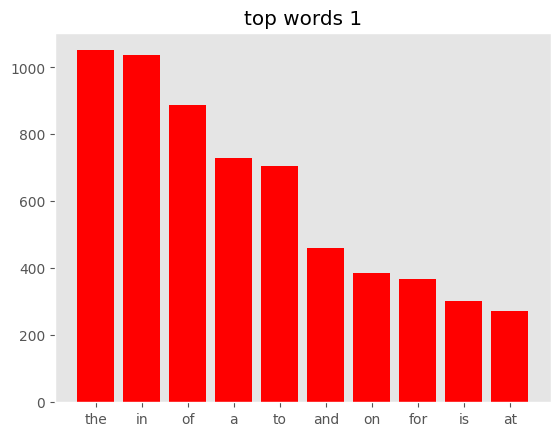

In [ ]:
x, y = zip(*top)

plt.grid()
plt.bar(x,y, color = 'r')
plt.title("top words 1")

## punctuation

In [ ]:
corpus = create_corpus(1)

dictionary = defaultdict(int)

import string

special_char = string.punctuation

for i in corpus:
    if i in special_char:
        dictionary[i] +=1




['Our', 'Deeds', 'are', 'the', 'Reason', 'of', 'this', '#earthquake', 'May', 'ALLAH', 'Forgive', 'us', 'all']
['Forest', 'fire', 'near', 'La', 'Ronge', 'Sask.', 'Canada']
['All', 'residents', 'asked', 'to', "'shelter", 'in', "place'", 'are', 'being', 'notified', 'by', 'officers.', 'No', 'other', 'evacuation', 'or', 'shelter', 'in', 'place', 'orders', 'are', 'expected']
['13,000', 'people', 'receive', '#wildfires', 'evacuation', 'orders', 'in', 'California']
['Just', 'got', 'sent', 'this', 'photo', 'from', 'Ruby', '#Alaska', 'as', 'smoke', 'from', '#wildfires', 'pours', 'into', 'a', 'school']
['#RockyFire', 'Update', '=>', 'California', 'Hwy.', '20', 'closed', 'in', 'both', 'directions', 'due', 'to', 'Lake', 'County', 'fire', '-', '#CAfire', '#wildfires']
['#flood', '#disaster', 'Heavy', 'rain', 'causes', 'flash', 'flooding', 'of', 'streets', 'in', 'Manitou,', 'Colorado', 'Springs', 'areas']
["I'm", 'on', 'top', 'of', 'the', 'hill', 'and', 'I', 'can', 'see', 'a', 'fire', 'in', 'the', 'w

Text(0.5, 1.0, 'Punctuation disaster 1')

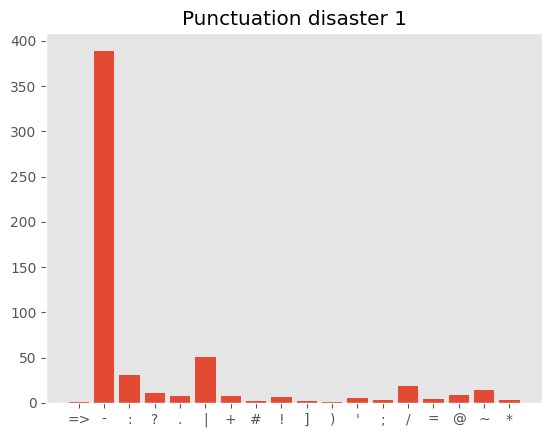

In [ ]:
x,y = zip(*dictionary.items())

plt.grid()
plt.bar(x,y)
plt.title("Punctuation disaster 1")

In [ ]:
corpus = create_corpus(0)

dictionary = defaultdict(int)

import string

special_char = string.punctuation

for i in corpus:
    if i in special_char:
        dictionary[i] +=1

["What's", 'up', 'man?']
['I', 'love', 'fruits']
['Summer', 'is', 'lovely']
['My', 'car', 'is', 'so', 'fast']
['What', 'a', 'goooooooaaaaaal!!!!!!']
['this', 'is', 'ridiculous....']
['London', 'is', 'cool', ';)']
['Love', 'skiing']
['What', 'a', 'wonderful', 'day!']
['LOOOOOOL']
['No', 'way...I', "can't", 'eat', 'that', 'shit']
['Was', 'in', 'NYC', 'last', 'week!']
['Love', 'my', 'girlfriend']
['Cooool', ':)']
['Do', 'you', 'like', 'pasta?']
['The', 'end!']
['We', 'always', 'try', 'to', 'bring', 'the', 'heavy.', '#metal', '#RT', 'http://t.co/YAo1e0xngw']
['Crying', 'out', 'for', 'more!', 'Set', 'me', 'ablaze']
['On', 'plus', 'side', 'LOOK', 'AT', 'THE', 'SKY', 'LAST', 'NIGHT', 'IT', 'WAS', 'ABLAZE', 'http://t.co/qqsmshaJ3N']
['@PhDSquares', '#mufc', "they've", 'built', 'so', 'much', 'hype', 'around', 'new', 'acquisitions', 'but', 'I', 'doubt', 'they', 'will', 'set', 'the', 'EPL', 'ablaze', 'this', 'season.']
['Ablaze', 'for', 'you', 'Lord', ':D']
['Check', 'these', 'out:', 'http://t.co

Text(0.5, 1.0, 'Punctuation disaster 0')

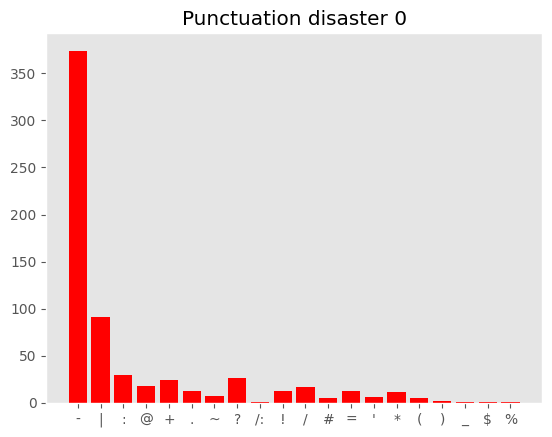

In [ ]:
x,y = zip(*dictionary.items())

plt.grid()
plt.bar(x,y, color = 'r')
plt.title("Punctuation disaster 0")

## Common words

In [ ]:
from collections import Counter

In [ ]:
counter = Counter(corpus)
most = counter.most_common()
x = []
y = []

for word, count in most[:40]:
    if word not in stop:
        x.append(word)
        y.append(count)

<Axes: title={'center': 'most common words'}>

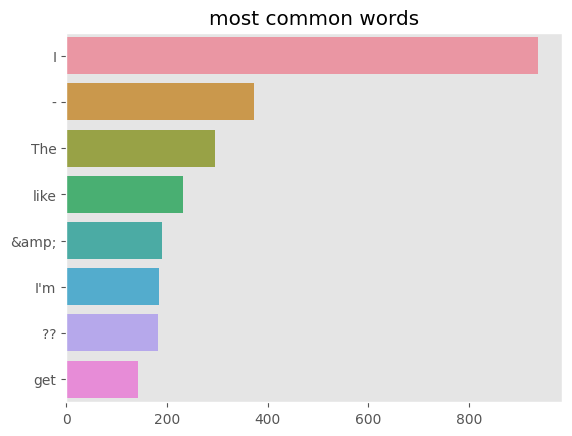

In [ ]:
plt.title("most common words")
plt.grid()
sns.barplot(x = y, y = x)

# Data cleaning

In [ ]:
df = pd.concat([train, test])
df.shape

(10876, 5)

In [ ]:
df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1.0
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1.0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1.0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1.0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1.0
...,...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,NaN
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,NaN
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...,NaN
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,NaN


## removing URLs

In [ ]:
import re

In [ ]:
def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)

In [ ]:
df["text"] = df["text"].apply(lambda x: remove_url(x))

In [ ]:
df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1.0
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1.0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1.0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1.0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1.0
...,...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,NaN
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,NaN
3260,10868,NaN,NaN,Green Line derailment in Chicago,NaN
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO),NaN


## remove html tag

In [ ]:
def remove_html(text):
    html = re.compile(r'<.*?>')
    return html.sub(r'', text)

In [ ]:
df["text"] = df["text"].apply(lambda x: remove_html(x))

In [ ]:
df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1.0
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1.0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1.0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1.0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1.0
...,...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,NaN
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,NaN
3260,10868,NaN,NaN,Green Line derailment in Chicago,NaN
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO),NaN


## Remove emoji

In [ ]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F" #emoticons
                               u"\U0001F300-\U0001F5FF" #symbols&pics
                               u"\U0001F680-\U0001F6FF" #transportation pic
                               u"\U0001F1E0-\U0001F1FF" #flags
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags = re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [ ]:
df["text"] = df["text"].apply(lambda x: remove_emoji(x))

In [ ]:
df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1.0
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1.0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1.0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1.0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1.0
...,...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,NaN
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,NaN
3260,10868,NaN,NaN,Green Line derailment in Chicago,NaN
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO),NaN


## Remove punctuation

In [ ]:
def remove_punctuation(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)

In [ ]:
df["text"] = df["text"].apply(lambda x: remove_punctuation(x))

In [ ]:
df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this earthquake Ma...,1.0
1,4,NaN,NaN,Forest fire near La Ronge Sask Canada,1.0
2,5,NaN,NaN,All residents asked to shelter in place are be...,1.0
3,6,NaN,NaN,13000 people receive wildfires evacuation orde...,1.0
4,7,NaN,NaN,Just got sent this photo from Ruby Alaska as s...,1.0
...,...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,NaN
3259,10865,NaN,NaN,Storm in RI worse than last hurricane My citya...,NaN
3260,10868,NaN,NaN,Green Line derailment in Chicago,NaN
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook HWO,NaN


## Spelling checker

Additional: spelling checker for indonesian dataset

In [ ]:
!pip install pyspellchecker

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from spellchecker import SpellChecker

In [ ]:
spell = SpellChecker()

def correct_spellings(text):
    corrected_text = []

    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            corrected_text.append(spell.correction(word))
        else:
            corrected_text.append(word)
    return " ".join(corrected_text)

In [ ]:
#df['text']=df['text'].apply(lambda x : correct_spellings(x))

# Glove vectorization (word2vec)

In [ ]:
from tqdm import tqdm
from nltk.tokenize import word_tokenize

In [ ]:
def create_corpus(df):
    corpus = []
    for tweet in tqdm(df["text"]):
        words = [word.lower() for word in word_tokenize(tweet) if \
        ((word.isalpha() == 1) & (word not in stop))]
        corpus.append(words)

    return corpus

In [ ]:
import nltk
nltk.download('punkt')

corpus = create_corpus(df)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
100%|██████████| 10876/10876 [00:01<00:00, 5802.94it/s]


In [ ]:
embedding_dict = {}

with open('drive/MyDrive/AI4DL_project/glove.6B.100d.txt','r') as glove:
    for line in glove:
        values = line.split()
        word = values[0]
        vectors = np.asarray(values[1:], 'float32')
        embedding_dict[word] = vectors

glove.close()

In [ ]:
pip install --upgrade tensorflow

In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding,LSTM,Dense,SpatialDropout1D, Dropout, Input
from keras.initializers import Constant
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
from keras import regularizers
from transformers import TFAutoModel, AutoTokenizer
from keras.models import Model

ImportError: ignored

In [ ]:
MAX_LEN = 50
tokenizer_obj = Tokenizer()
tokenizer_obj.fit_on_texts(corpus)

sequences = tokenizer_obj.texts_to_sequences(corpus)

tweet_pad = pad_sequences(sequences,
                          maxlen = MAX_LEN,
                         truncating = 'post',
                         padding = 'post')

In [ ]:
word_index = tokenizer_obj.word_index
print('number of unique words: ', len(word_index))

number of unique words:  20342


In [ ]:
num_words = len(word_index) + 1
embedding_matrix = np.zeros((num_words,100))


for word, i in tqdm(word_index.items()):
    if i > num_words:
        continue

    embedding_vector = embedding_dict.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

100%|██████████| 20342/20342 [00:00<00:00, 476549.85it/s]


In [ ]:
def encode_tweets(tokenizer, tweets, max_len):
    nb_tweets = len(tweets)
    tokens = np.ones((nb_tweets,max_len),dtype='int32')
    masks = np.zeros((nb_tweets,max_len),dtype='int32')
    segs = np.zeros((nb_tweets,max_len),dtype='int32')

    for k in range(nb_tweets):
        # INPUT_IDS
        tweet = tweets[k]
        enc = tokenizer.encode(tweet)
        if len(enc) < max_len-2:
            tokens[k,:len(enc)+2] = [0] + enc + [2]
            masks[k,:len(enc)+2] = 1
        else:
            tokens[k,:max_len] = [0] + enc[:max_len-2] + [2]
            masks[k,:max_len] = 1
    return tokens,masks,segs

In [ ]:
x

['I', '-', 'The', 'like', '&amp;', "I'm", '??', 'get']

In [ ]:
type(x)

list

In [ ]:
MAX_LEN

50

In [ ]:
ids = Input((MAX_LEN,), dtype=tf.int32)
attention = Input((MAX_LEN,), dtype=tf.int32)
token = Input((MAX_LEN,), dtype=tf.int32)

bertweet = TFAutoModel.from_pretrained("vinai/bertweet-base")
x,_ = bertweet(ids,attention_mask=attention,token_type_ids=token)



Some layers from the model checkpoint at vinai/bertweet-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at vinai/bertweet-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


In [ ]:
x[]

TypeError: ignored

In [ ]:
    out = Dense(1,activation='sigmoid')(x[:,0,:])

    model = Model(inputs=[ids, attention, token], outputs = out)
    optimizer = Adam(learning_rate=1e-5)
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])


In [ ]:
def build_model(max_len):
    ids = Input((max_len,), dtype=tf.int32)
    attention = Input((max_len,), dtype=tf.int32)
    token = Input((max_len,), dtype=tf.int32)

    bertweet = TFAutoModel.from_pretrained("vinai/bertweet-base")
    x,_ = bertweet(ids,attention_mask=attention,token_type_ids=token)

    out = Dense(1,activation='sigmoid')(x[:,0,:])

    model = Model(inputs=[ids, attention, token], outputs = out)
    optimizer = Adam(learning_rate=1e-5)
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model


model = build_model(MAX_LEN)
model.summary()

Some layers from the model checkpoint at vinai/bertweet-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at vinai/bertweet-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


TypeError: ignored

In [ ]:
optimizer = Adam(learning_rate=1e-5)

model.compile(loss = 'binary_crossentropy', optimizer = optimizer, metrics = ["accuracy"])

In [ ]:
test_data = tweet_pad[train.shape[0]:]

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("vinai/bertweet-base")

In [ ]:
train_tokens, train_masks, train_segs = encode_tweets(tokenizer, train["text"].to_list(), MAX_LEN)
train_labels = train["target"]

In [ ]:
train_segs[0]

In [ ]:
"""X_train, X_test, y_train, y_test = train_test_split(train_data, train["target"].values, test_size = 0.15)
"""

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

#CKPT = ModelCheckpoint('./ckpt.h5', save_best_only=True, monitor='val_loss', mode='min')
ES = EarlyStopping(monitor='val_loss', mode='min', patience=10, restore_best_weights=True, verbose=1)

In [ ]:
hist = model.fit([train_tokens,train_masks,train_segs], train_labels,
                 batch_size = 32, epochs = 50,
                 validation_split = 0.1, callbacks= [ES])

In [ ]:
submit = pd.read_csv("../input/nlp-getting-started/sample_submission.csv")

In [ ]:
test_tokens, test_masks, test_segs = encode_tweets(tokenizer,test["text"].to_list(), MAX_LEN)

In [ ]:
test["target"] = model.predict([test_tokens, test_masks, test_segs]).round().astype(int)
submission = test[["id", "target"]]
submission.to_csv("submission.csv",index=False)